First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol    

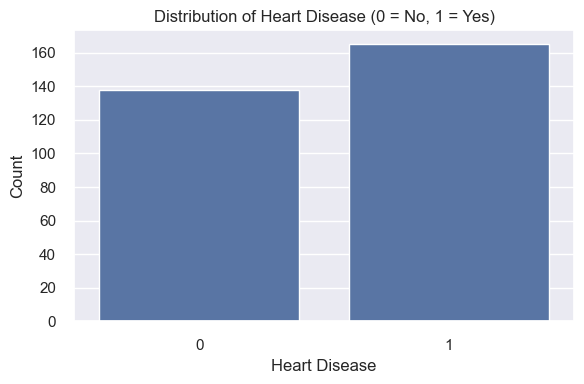

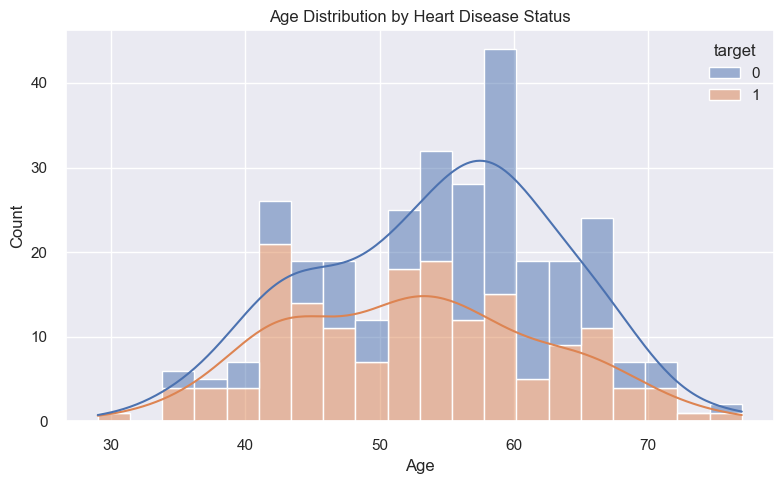

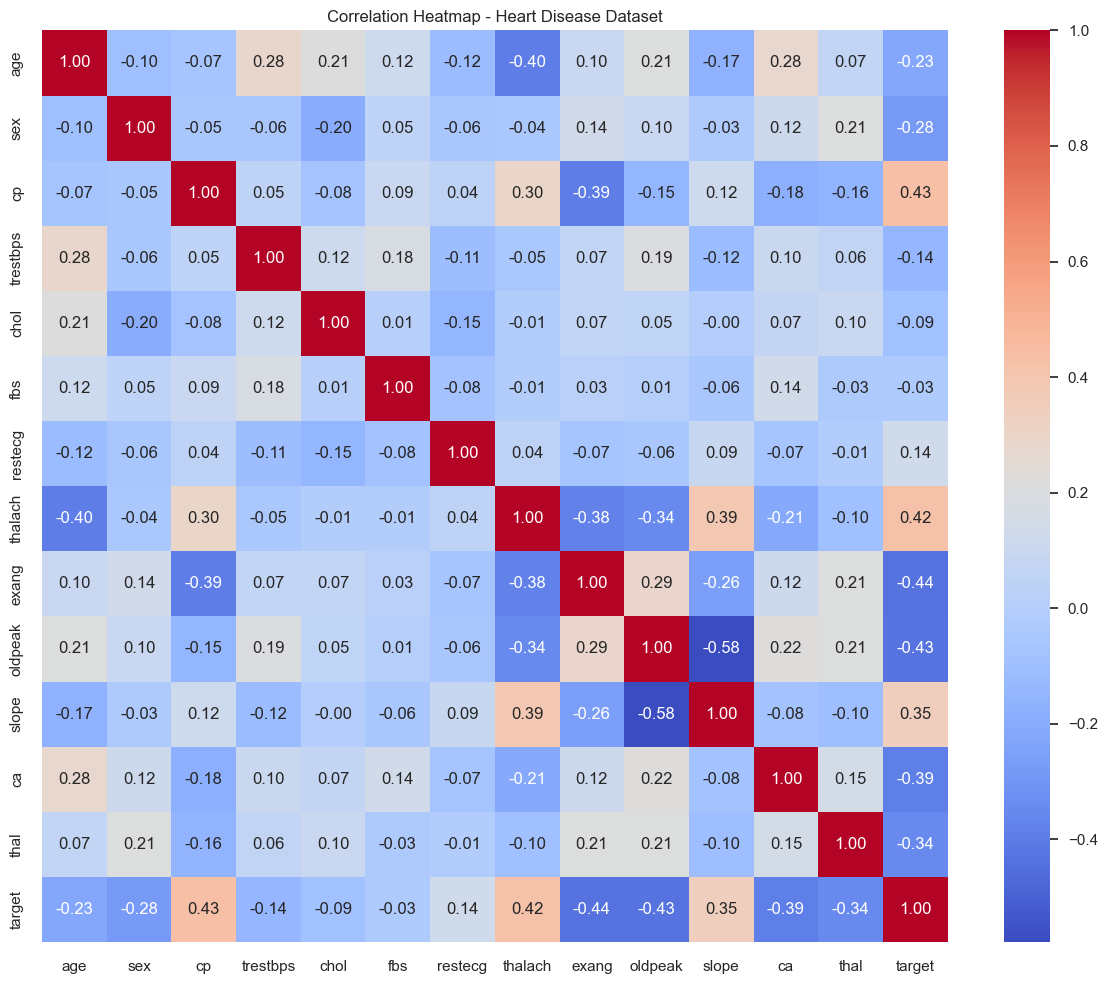


Training shape: (242, 13)
Testing shape: (61, 13)

===== Logistic Regression =====
Accuracy: 0.8032786885245902
Confusion Matrix:
 [[19  9]
 [ 3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


===== Random Forest =====
Accuracy: 0.7868852459016393
Confusion Matrix:
 [[17 11]
 [ 2 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



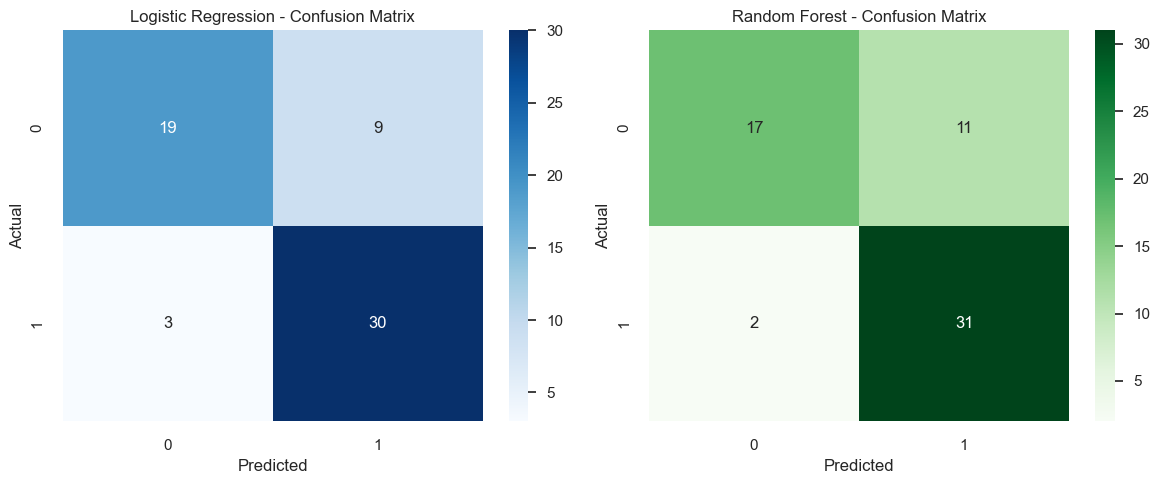

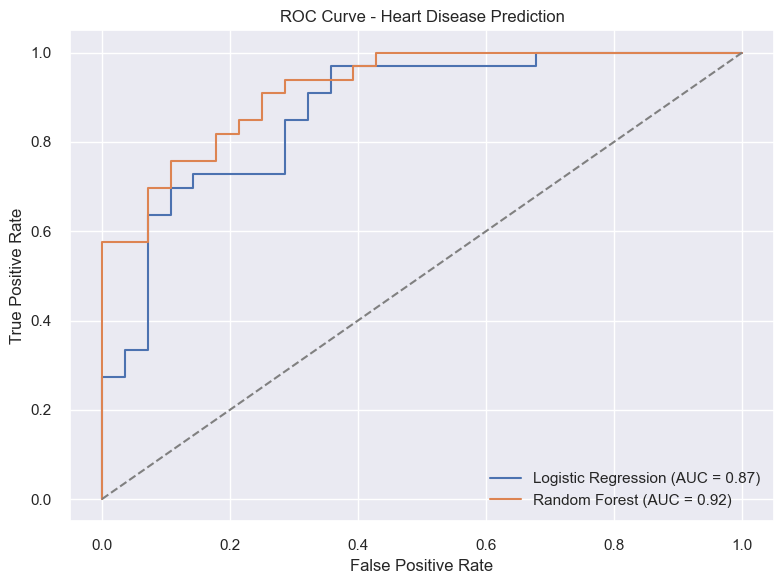

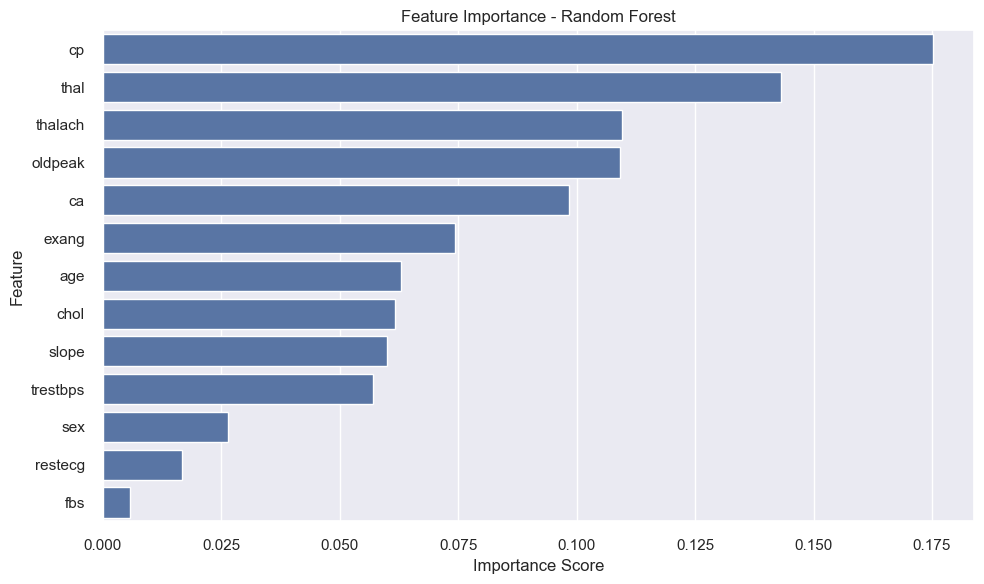


Top Important Features:
     feature  importance
2        cp    0.175126
12     thal    0.143078
7   thalach    0.109609
9   oldpeak    0.109107
11       ca    0.098475

Sample Patient Features:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   

     slope  ca  thal  
179      1   1     1  

Logistic Regression Prediction: No Heart Disease
Random Forest Prediction: No Heart Disease


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

plt.style.use("seaborn-v0_8")
sns.set()


df = pd.read_csv("heart.csv")   # Make sure heart.csv is in the same folder

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())



# 3.1 Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.2 Age distribution by target
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="target", bins=20, kde=True, multiple="stack")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.3 Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Heart Disease Dataset")
plt.tight_layout()
plt.show()


X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining shape:", X_train.shape)
print("Testing shape:", X_test.shape)


# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 6.1 Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# 6.2 Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=5
)
rf.fit(X_train, y_train)  # Trees don't need scaled data
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]



def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return acc, cm

acc_log, cm_log = evaluate_model("Logistic Regression", y_test, y_pred_log)
acc_rf, cm_rf = evaluate_model("Random Forest", y_test, y_pred_rf)



fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("ROC Curve - Heart Disease Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()



importances = rf.feature_importances_
features = X.columns

fi_df = pd.DataFrame({"feature": features, "importance": importances})
fi_df = fi_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop Important Features:\n", fi_df.head())



sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

pred_log_single = log_reg.predict(sample_scaled)[0]
pred_rf_single = rf.predict(sample)[0]

print("\nSample Patient Features:")
print(sample)

print("\nLogistic Regression Prediction:",
      "Heart Disease" if pred_log_single == 1 else "No Heart Disease")
print("Random Forest Prediction:",
      "Heart Disease" if pred_rf_single == 1 else "No Heart Disease")
